In [84]:
import tensorflow as tf
import math
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.impute import SimpleImputer # import simple imputer
from sklearn.model_selection import train_test_split




In [42]:
data =pd.read_csv("Data/Anuradapura_demand.csv",index_col="Month",parse_dates=["Month"])
data.head()

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,,
2015-01-01,13.355776,26.7,31.3,22.2,15.8,69,92.0
2015-02-01,12.717279,26.8,31.2,22.3,129.8,71,92.0
2015-03-01,13.780719,28.7,33.6,23.7,26.0,64,89.0
2015-04-01,14.926229,29.2,34.1,24.2,288.2,68,91.0
2015-05-01,15.463069,29.3,33.5,25.1,264.7,73,91.0


In [43]:
data.shape

(84, 7)

In [44]:
data.describe(include='all')

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000
mean,18.291453,28.398810,32.642857,24.151190,114.367857,69.238095,90.397590
std,3.224086,1.349296,1.755356,1.193203,117.104345,6.399584,3.083946
min,8.302096,25.600000,28.600000,20.900000,0.000000,57.000000,83.000000
25%,16.197128,27.150000,31.275000,23.475000,18.500000,65.000000,88.000000
50%,18.773882,28.800000,33.000000,24.350000,73.950000,68.500000,91.000000
75%,20.547705,29.400000,33.925000,25.100000,170.975000,73.250000,92.000000
max,30.408826,31.100000,36.400000,25.900000,463.100000,84.000000,96.000000


In [45]:
data.isnull().sum()

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    1
dtype: int64

In [46]:
sample_data= data.copy()
sample_data.isnull().sum()

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    1
dtype: int64

In [47]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
sample_data.HumidityNight = imputer.fit_transform(sample_data['HumidityNight'].values.reshape(-1,1))[:,0]

In [48]:
sample_data.isnull().sum()

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    0
dtype: int64

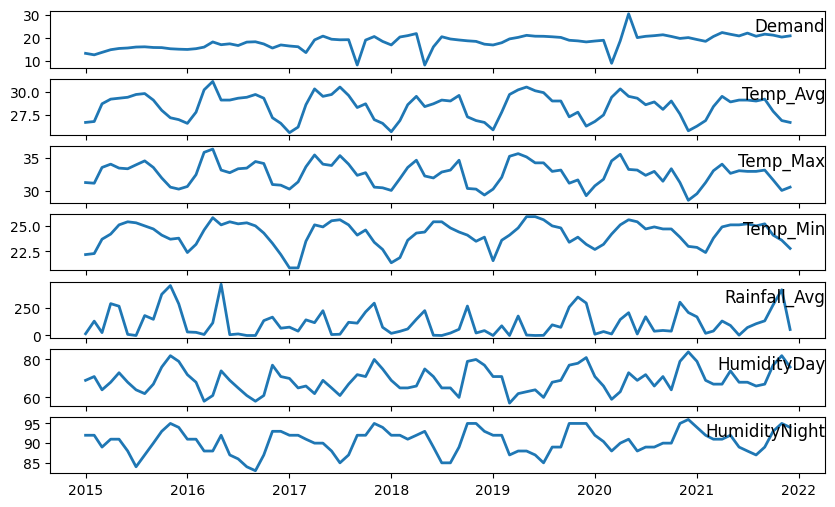

In [49]:
no_cols =len(sample_data.columns)
index=1
plt.figure(figsize=(10,6))
for column in sample_data.columns:
    plt.subplot(no_cols,1,index)
    plt.plot(sample_data[column],linewidth=2)
    plt.title(column,loc='right',y=0.5)
    index+=1
    
plt.show()   


In [50]:
df_input=sample_data[['Demand','Temp_Avg','Rainfall_Avg','HumidityDay','HumidityNight']]

In [10]:
df_input.describe()

,Demand,Temp_Avg,Rainfall_Avg,HumidityDay,HumidityNight
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,18.291453,28.398810,114.367857,69.238095,90.397590
std,3.224086,1.349296,117.104345,6.399584,3.065312
min,8.302096,25.600000,0.000000,57.000000,83.000000
25%,16.197128,27.150000,18.500000,65.000000,88.000000
50%,18.773882,28.800000,73.950000,68.500000,91.000000
75%,20.547705,29.400000,170.975000,73.250000,92.000000
max,30.408826,31.100000,463.100000,84.000000,96.000000


In [11]:
features_1=sample_data[['Demand','Temp_Avg','Rainfall_Avg','HumidityDay','HumidityNight']].to_numpy().tolist()

target_1=sample_data['Demand'].tolist()

In [12]:
ts_generator=TimeseriesGenerator(features_1,target_1,length=6,sampling_rate=1,batch_size=1)


In [13]:
ts_generator[0]

(array([[[ 13.355776,  26.7     ,  15.8     ,  69.      ,  92.      ],
         [ 12.717279,  26.8     , 129.8     ,  71.      ,  92.      ],
         [ 13.780719,  28.7     ,  26.      ,  64.      ,  89.      ],
         [ 14.926229,  29.2     , 288.2     ,  68.      ,  91.      ],
         [ 15.463069,  29.3     , 264.7     ,  73.      ,  91.      ],
         [ 15.668344,  29.4     ,  10.1     ,  68.      ,  88.      ]]]),
 array([16.077157]))

In [51]:
scaler =StandardScaler()
scaled_data=scaler.fit_transform(df_input)
print(scaled_data)

[[-1.54007105e+00 -1.26659538e+00 -8.46765011e-01 -3.74282533e-02
   5.25895475e-01]
 [-1.73930021e+00 -1.19203755e+00  1.32572615e-01  2.76969074e-01
   5.25895475e-01]
 [-1.40747679e+00  2.24561058e-01 -7.59140066e-01 -8.23421573e-01
  -4.58675753e-01]
 [-1.05004521e+00  5.97350167e-01  1.49333648e+00 -1.94626917e-01
   1.97705066e-01]
 [-8.82535913e-01  6.71907989e-01  1.29145547e+00  5.91366402e-01
   1.97705066e-01]
 [-8.18484295e-01  7.46465811e-01 -8.95731893e-01 -1.94626917e-01
  -7.86866162e-01]
 [-6.90923053e-01  9.70139276e-01 -9.82497770e-01 -8.23421573e-01
  -2.09962780e+00]
 [-6.59910556e-01  1.04469710e+00  5.65542935e-01 -1.13781890e+00
  -1.11505657e+00]
 [-7.50160073e-01  5.22792345e-01  2.75177919e-01 -3.51825581e-01
  -1.30485344e-01]
 [-7.68019327e-01 -2.97343694e-01  2.21667181e+00  1.06296239e+00
   8.54085885e-01]
 [-9.22143854e-01 -8.93806268e-01  2.89533560e+00  2.00615438e+00
   1.51046670e+00]
 [-9.80022615e-01 -1.04292191e+00  1.47787325e+00  1.53455839e+00

<Axes: >

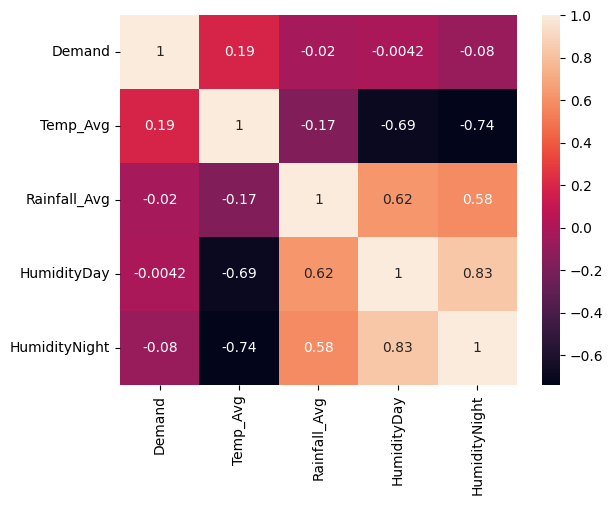

In [49]:
sns.heatmap(df_input.corr(),annot=True)

In [52]:
features=scaled_data
target=scaled_data[:,0]

In [53]:
TimeseriesGenerator(features,target,length=6,sampling_rate=1,batch_size=1)[0]

(array([[[-1.54007105, -1.26659538, -0.84676501, -0.03742825,
           0.52589548],
         [-1.73930021, -1.19203755,  0.13257262,  0.27696907,
           0.52589548],
         [-1.40747679,  0.22456106, -0.75914007, -0.82342157,
          -0.45867575],
         [-1.05004521,  0.59735017,  1.49333648, -0.19462692,
           0.19770507],
         [-0.88253591,  0.67190799,  1.29145547,  0.5913664 ,
           0.19770507],
         [-0.81848429,  0.74646581, -0.89573189, -0.19462692,
          -0.78686616]]]),
 array([-0.69092305]))

In [54]:
X_train,X_test,y_train,y_test =train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)


In [55]:
X_train.shape

(67, 5)

In [56]:
X_test.shape

(17, 5)

In [57]:
train_generator=TimeseriesGenerator(X_train,y_train,length=6,sampling_rate=1,batch_size=10)
test_generator=TimeseriesGenerator(X_test,y_test,length=6,sampling_rate=1,batch_size=10)

In [56]:
train_generator[0]

(array([[[0.22860369, 0.2       , 0.0341179 , 0.44444444, 0.69230769],
         [0.19972122, 0.21818182, 0.28028504, 0.51851852, 0.69230769],
         [0.24782602, 0.56363636, 0.05614338, 0.25925926, 0.46153846],
         [0.29964328, 0.65454545, 0.62232779, 0.40740741, 0.61538462],
         [0.32392728, 0.67272727, 0.57158281, 0.59259259, 0.61538462],
         [0.33321292, 0.69090909, 0.02180954, 0.40740741, 0.38461538]],
 
        [[0.19972122, 0.21818182, 0.28028504, 0.51851852, 0.69230769],
         [0.24782602, 0.56363636, 0.05614338, 0.25925926, 0.46153846],
         [0.29964328, 0.65454545, 0.62232779, 0.40740741, 0.61538462],
         [0.32392728, 0.67272727, 0.57158281, 0.59259259, 0.61538462],
         [0.33321292, 0.69090909, 0.02180954, 0.40740741, 0.38461538],
         [0.35170561, 0.74545455, 0.        , 0.25925926, 0.07692308]],
 
        [[0.24782602, 0.56363636, 0.05614338, 0.25925926, 0.46153846],
         [0.29964328, 0.65454545, 0.62232779, 0.40740741, 0.61538462],


In [58]:
#difine model architecture
model=keras.Sequential()
model.add(keras.layers.LSTM(128,input_shape=(6,5),return_sequences=True))
model.add(keras.layers.LeakyReLU(alpha=0.5)) #activation functon
model.add(keras.layers.LSTM(128,return_sequences=True))
model.add(keras.layers.LeakyReLU(alpha=0.5))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(64,return_sequences=False))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))






In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 128)            68608     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 128)            131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6, 128)            0         
                                                                 
 dropout (Dropout)           (None, 6, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [61]:
early_stopping =keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50
7/7 [==============================] - 13s 479ms/step - loss: 1.0357 - mean_absolute_error: 0.7002 - val_loss: 0.7932 - val_mean_absolute_error: 0.8393
Epoch 2/50
7/7 [==============================] - 0s 35ms/step - loss: 0.9825 - mean_absolute_error: 0.6657 - val_loss: 0.7029 - val_mean_absolute_error: 0.7855
Epoch 3/50
7/7 [==============================] - 0s 47ms/step - loss: 0.9375 - mean_absolute_error: 0.6286 - val_loss: 0.5667 - val_mean_absolute_error: 0.7012
Epoch 4/50
7/7 [==============================] - 0s 47ms/step - loss: 0.9069 - mean_absolute_error: 0.5787 - val_loss: 0.4229 - val_mean_absolute_error: 0.6056
Epoch 5/50
7/7 [==============================] - 0s 43ms/step - loss: 0.8884 - mean_absolute_error: 0.5199 - val_loss: 0.3334 - val_mean_absolute_error: 0.5352
Epoch 6/50
7/7 [==============================] - 0s 40ms/step - loss: 0.8956 - mean_absolute_error: 0.4964 - val_loss: 0.2966 - val_mean_absolute_error: 0.5022
Epoch 7/50
7/7 [================

In [62]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 6ms/step - loss: 0.3564 - mean_absolute_error: 0.5467


[0.3564210832118988, 0.5466734170913696]

In [63]:
prediction=model.predict(test_generator)

2/2 [==============================] - 2s 6ms/step


In [64]:
prediction.shape[0]

11

In [65]:
prediction

array([[0.2565101 ],
       [0.22374953],
       [0.21935737],
       [0.2590827 ],
       [0.37805414],
       [0.4242091 ],
       [0.4839672 ],
       [0.44191095],
       [0.3910555 ],
       [0.3488789 ],
       [0.19866952]], dtype=float32)

In [66]:
y_test

array([0.84199137, 0.9615157 , 0.7361732 , 0.46908724, 0.58097093,
       0.32240084, 0.07880125, 0.73242013, 1.26345898, 1.02747412,
       0.80617458, 1.18673058, 0.76393468, 1.04275602, 0.9120227 ,
       0.65332219, 0.81633984])

In [67]:
X_test

array([[ 8.41991374e-01,  3.73676702e-01, -6.47461213e-01,
        -5.09024245e-01, -4.58675753e-01],
       [ 9.61515702e-01, -2.22785872e-01, -5.90762719e-01,
         2.76969074e-01, -1.30485344e-01],
       [ 7.36173202e-01,  4.48234524e-01, -6.44884009e-01,
        -8.23421573e-01, -1.30485344e-01],
       [ 4.69087239e-01, -5.95574981e-01,  1.60329719e+00,
         1.53455839e+00,  1.51046670e+00],
       [ 5.80970929e-01, -1.93761577e+00,  8.03504796e-01,
         2.32055170e+00,  1.83865711e+00],
       [ 3.22400843e-01, -1.56482666e+00,  4.63313831e-01,
         1.53455839e+00,  1.18227629e+00],
       [ 7.88012532e-02, -1.11747973e+00, -8.12402287e-01,
        -3.74282533e-02,  5.25895475e-01],
       [ 7.32420125e-01,  8.87593116e-04, -6.34575192e-01,
        -3.51825581e-01,  1.97705066e-01],
       [ 1.26345898e+00,  8.21023632e-01,  1.42881433e-01,
        -3.51825581e-01,  1.97705066e-01],
       [ 1.02747412e+00,  3.73676702e-01, -2.04182077e-01,
         7.48565066e-01

In [68]:
X_test[:,1:][6:]

array([[-1.11747973e+00, -8.12402287e-01, -3.74282533e-02,
         5.25895475e-01],
       [ 8.87593116e-04, -6.34575192e-01, -3.51825581e-01,
         1.97705066e-01],
       [ 8.21023632e-01,  1.42881433e-01, -3.51825581e-01,
         1.97705066e-01],
       [ 3.73676702e-01, -2.04182077e-01,  7.48565066e-01,
         5.25895475e-01],
       [ 5.22792345e-01, -9.56725727e-01, -1.94626917e-01,
        -4.58675753e-01],
       [ 5.22792345e-01, -3.63109675e-01, -1.94626917e-01,
        -7.86866162e-01],
       [ 4.48234524e-01, -7.01674546e-02, -5.09024245e-01,
        -1.11505657e+00],
       [ 5.97350167e-01,  1.56626522e-01, -3.51825581e-01,
        -4.58675753e-01],
       [-3.71901516e-01,  1.39282551e+00,  1.22016106e+00,
         8.54085885e-01],
       [-1.11747973e+00,  2.57060786e+00,  2.00615438e+00,
         1.51046670e+00],
       [-1.26659538e+00, -5.18600999e-01,  1.06296239e+00,
         1.18227629e+00]])

In [69]:
df_pred=pd.concat([pd.DataFrame(prediction),pd.DataFrame(X_test[:,1:][6:])],axis=1)

In [70]:
df_pred

,0,0,1,2,3
0,0.256510,-1.117480,-0.812402,-0.037428,0.525895
1,0.223750,0.000888,-0.634575,-0.351826,0.197705
2,0.219357,0.821024,0.142881,-0.351826,0.197705
3,0.259083,0.373677,-0.204182,0.748565,0.525895
4,0.378054,0.522792,-0.956726,-0.194627,-0.458676
5,0.424209,0.522792,-0.363110,-0.194627,-0.786866
6,0.483967,0.448235,-0.070167,-0.509024,-1.115057
7,0.441911,0.597350,0.156627,-0.351826,-0.458676
8,0.391055,-0.371902,1.392826,1.220161,0.854086
9,0.348879,-1.117480,2.570608,2.006154,1.510467


In [71]:
rev_trans=scaler.inverse_transform(df_pred)


In [72]:
rev_trans

array([[ 19.11352593,  26.9       ,  19.8       ,  69.        ,
         92.        ],
       [ 19.00853362,  28.4       ,  40.5       ,  67.        ,
         91.        ],
       [ 18.99445746,  29.5       , 131.        ,  67.        ,
         91.        ],
       [ 19.12177068,  28.9       ,  90.6       ,  74.        ,
         92.        ],
       [ 19.50305476,  29.1       ,   3.        ,  68.        ,
         89.        ],
       [ 19.65097384,  29.1       ,  72.1       ,  68.        ,
         88.        ],
       [ 19.8424889 ,  29.        , 106.2       ,  66.        ,
         87.        ],
       [ 19.70770543,  29.2       , 132.6       ,  67.        ,
         89.        ],
       [ 19.54472197,  27.9       , 276.5       ,  77.        ,
         93.        ],
       [ 19.40955283,  26.9       , 413.6       ,  82.        ,
         95.        ],
       [ 18.92815628,  26.7       ,  54.        ,  76.        ,
         94.        ]])

In [73]:
df_final=df_input[prediction.shape[0]*-1:]

In [74]:
df_final.count()

Demand           11
Temp_Avg         11
Rainfall_Avg     11
HumidityDay      11
HumidityNight    11
dtype: int64

In [75]:
df_final['Demand_Predicted']=rev_trans[:,0]

C:\Users\Shani\AppData\Local\Temp\ipykernel_54168\4142619263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Demand_Predicted']=rev_trans[:,0]


In [76]:
df_final

,Demand,Temp_Avg,Rainfall_Avg,HumidityDay,HumidityNight,Demand_Predicted
Month,,,,,,
2021-02-01,18.543998,26.9,19.8,69,92.0,19.113526
2021-03-01,20.638740,28.4,40.5,67,91.0,19.008534
2021-04-01,22.340633,29.5,131.0,67,91.0,18.994457
2021-05-01,21.584340,28.9,90.6,74,92.0,19.121771
2021-06-01,20.875111,29.1,3.0,68,89.0,19.503055
2021-07-01,22.094731,29.1,72.1,68,88.0,19.650974
2021-08-01,20.739739,29.0,106.2,66,87.0,19.842489
2021-09-01,21.633316,29.2,132.6,67,89.0,19.707705
2021-10-01,21.214337,27.9,276.5,77,93.0,19.544722


<Axes: xlabel='Month'>

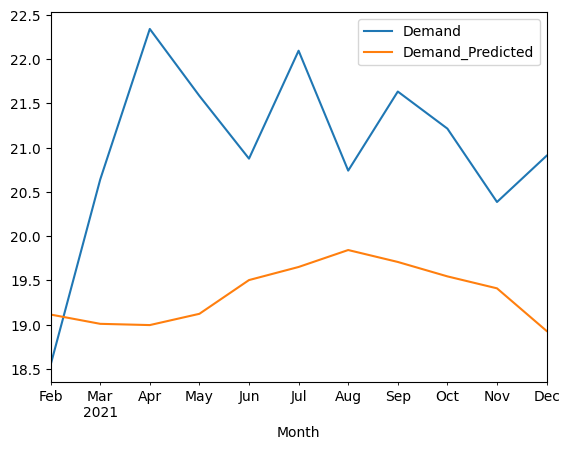

In [77]:
df_final[['Demand','Demand_Predicted']].plot()

In [78]:
rmse=sqrt(mean_squared_error(df_final['Demand'],df_final['Demand_Predicted']))
print(rmse)

1.9133201013448953


In [80]:
mse=mean_squared_error(df_final['Demand'],df_final['Demand_Predicted'])
print(mse)

3.66079381021044


In [81]:
mae=mean_absolute_error(df_final['Demand'],df_final['Demand_Predicted'])
print(mae)

1.751999287928151


In [85]:
mape=mean_absolute_percentage_error(df_final['Demand'],df_final['Demand_Predicted'])
print(mape)

0.08212899896185205
